In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import netwulf as nw
from scipy.optimize import minimize

In [2]:
#given "points" with labels a and b we can assign probability of an edge between them
def basic_func(a,b):
    if a == b:
        return .8
    else:
        return .1

In [3]:
def create_graph(num_nodes, labels, func):
    G = nx.Graph()
    for i in range(num_nodes):
        G.add_node(i, group=labels[i])
        for j in range(i):
            if func(labels[i], labels[j]) != func(labels[j],labels[i]):
                print("WARNING, asymetric function")
            if np.random.rand() < func(labels[i], labels[j]):
                G.add_edge(i, j)
    return G

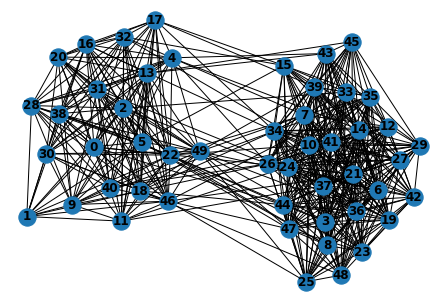

In [4]:
n = 50
G = create_graph(n, np.random.randint(2,size=100), basic_func)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# Or detect communities and encode them in 'group' attribute
# import community
# bb = community.best_partition(G)
# nx.set_node_attributes(G, bb, 'group')

# Set node 'size' attributes
for n, data in G.nodes(data=True):
    data['size'] = 1

# Set link 'weight' attributes
for n1, n2, data in G.edges(data=True):
    data['weight'] = 1

nw.visualize(G)